<a href="https://colab.research.google.com/github/fatach/MachineLearning/blob/master/TESLA_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting   Prophet is a forecasting package deeloped by Facebook
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'


## Importing the Dataset & Exploring it

In [ ]:
df= pd.read_csv("NFLX.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,538.489990,543.690002,526.320007,539.849976,539.849976,4486100
1,2022-01-11,536.989990,543.909973,530.070007,540.840027,540.840027,3077800
2,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
3,2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
4,2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7861100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,279.313040,285.393600,272.923200,279.294681,279.294681,1.097049e+07
std,86.211782,86.945137,84.224673,85.494164,85.494164,1.097476e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,3.077800e+06
25%,214.845001,224.547504,211.550003,216.862503,216.862503,5.983000e+06
50%,248.955002,251.805000,245.769997,249.205002,249.205002,8.215800e+06
75%,349.399994,354.084999,340.502510,344.012504,344.012504,1.260025e+07
max,544.270020,544.270020,532.020020,540.840027,540.840027,1.333875e+08


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df, y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

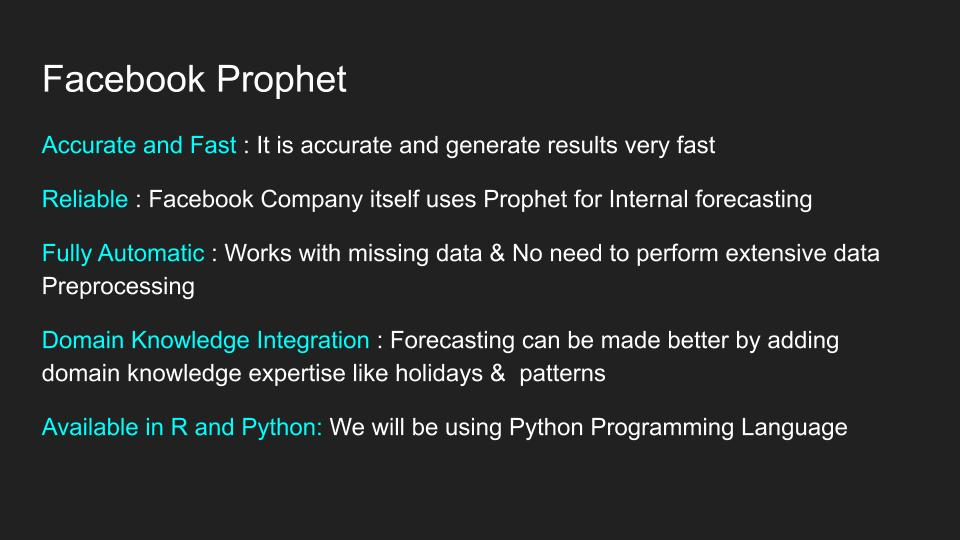

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-10,538.489990,543.690002,526.320007,539.849976,539.849976,4486100
1,2022-01-11,536.989990,543.909973,530.070007,540.840027,540.840027,3077800
2,2022-01-12,544.270020,544.270020,532.020020,537.219971,537.219971,3787400
3,2022-01-13,537.059998,540.789978,518.260010,519.200012,519.200012,4475100
4,2022-01-14,517.599976,538.369995,511.880005,525.690002,525.690002,7861100
...,...,...,...,...,...,...,...
245,2022-12-30,285.529999,295.010010,283.220001,294.880005,294.880005,7557400
246,2023-01-03,298.059998,298.390015,288.700012,294.950012,294.950012,6764000
247,2023-01-04,298.239990,311.140015,295.510010,309.410004,309.410004,9345100
248,2023-01-05,307.000000,314.179993,304.549988,309.700012,309.700012,8328400


In [ ]:
from tables.table import Column
Column=['Date',"Close"]
ndf= pd.DataFrame(df, columns=Column)

In [ ]:
ndf

,Date,Close
0,2022-01-10,539.849976
1,2022-01-11,540.840027
2,2022-01-12,537.219971
3,2022-01-13,519.200012
4,2022-01-14,525.690002
...,...,...
245,2022-12-30,294.880005
246,2023-01-03,294.950012
247,2023-01-04,309.410004
248,2023-01-05,309.700012


In [ ]:
prophet_df= ndf.rename(columns={'Date':'ds', "Close":"y"})

In [ ]:
prophet_df

,ds,y
0,2022-01-10,539.849976
1,2022-01-11,540.840027
2,2022-01-12,537.219971
3,2022-01-13,519.200012
4,2022-01-14,525.690002
...,...,...
245,2022-12-30,294.880005
246,2023-01-03,294.950012
247,2023-01-04,309.410004
248,2023-01-05,309.700012


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn81l80im/xh47hv3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn81l80im/cfs1wfh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3636', 'data', 'file=/tmp/tmpn81l80im/xh47hv3h.json', 'init=/tmp/tmpn81l80im/cfs1wfh5.json', 'output', 'file=/tmp/tmpn81l80im/prophet_modelz0cpfqs6/prophet_model-20230108151321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:13:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecastT=m.predict(future)

In [ ]:
forecastT

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-10,495.612821,447.561353,528.429587,495.612821,495.612821,-7.408838,-7.408838,-7.408838,-7.408838,-7.408838,-7.408838,0.0,0.0,0.0,488.203983
1,2022-01-11,493.451378,446.200571,522.442992,493.451378,493.451378,-8.407351,-8.407351,-8.407351,-8.407351,-8.407351,-8.407351,0.0,0.0,0.0,485.044027
2,2022-01-12,491.289936,443.385872,521.106692,491.289936,491.289936,-8.388775,-8.388775,-8.388775,-8.388775,-8.388775,-8.388775,0.0,0.0,0.0,482.901161
3,2022-01-13,489.128493,443.891676,519.993222,489.128493,489.128493,-7.900775,-7.900775,-7.900775,-7.900775,-7.900775,-7.900775,0.0,0.0,0.0,481.227718
4,2022-01-14,486.967051,437.331281,513.796543,486.967051,486.967051,-10.992099,-10.992099,-10.992099,-10.992099,-10.992099,-10.992099,0.0,0.0,0.0,475.974952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2023-02-01,337.681246,290.152326,366.071574,334.161545,341.178740,-8.388775,-8.388775,-8.388775,-8.388775,-8.388775,-8.388775,0.0,0.0,0.0,329.292471
276,2023-02-02,338.322300,289.807249,367.974389,334.485244,341.968534,-7.900775,-7.900775,-7.900775,-7.900775,-7.900775,-7.900775,0.0,0.0,0.0,330.421525
277,2023-02-03,338.963354,292.134927,367.141983,334.849783,342.841378,-10.992099,-10.992099,-10.992099,-10.992099,-10.992099,-10.992099,0.0,0.0,0.0,327.971255
278,2023-02-04,339.604408,326.241255,397.736508,335.410781,343.749729,21.548910,21.548910,21.548910,21.548910,21.548910,21.548910,0.0,0.0,0.0,361.153317


In [ ]:
px.line(forecastT, x='ds' ,y='yhat')

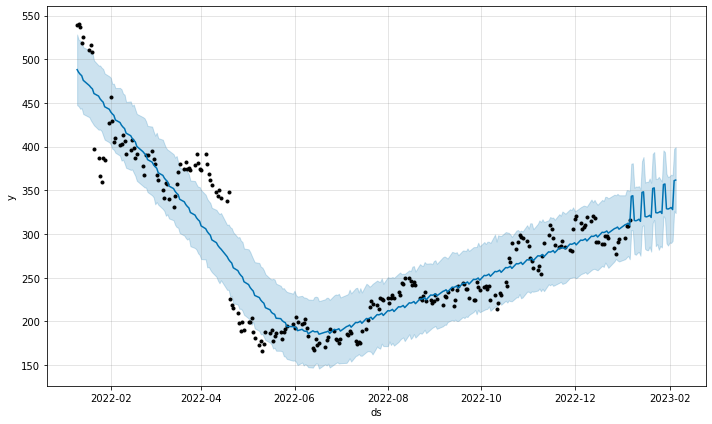

In [ ]:
figure=m.plot(forecastT, xlabel='ds',ylabel="y")

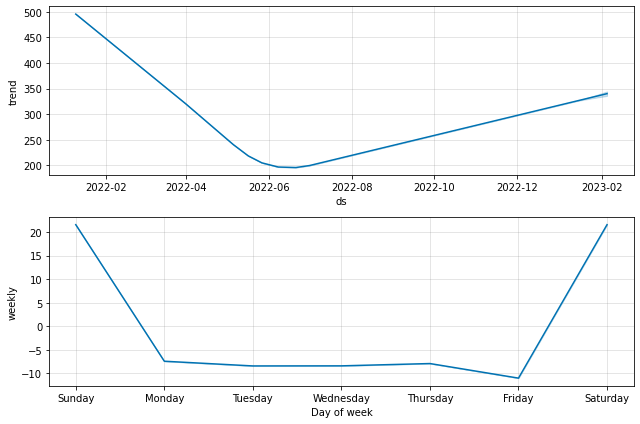

In [ ]:
figure2= m.plot_components(forecastT)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecastT.to_csv('forecastT.csv')
files.download('forecastT.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>